In [126]:
from undersampling import KUS

In [127]:
#instantiating KUS class
kus = KUS()

In [128]:
import pandas as pd
import numpy as np


# Testing on Nhanes data 

In [129]:
nhanes = pd.read_csv('nhanes.csv')
nhanes.head()

,Unnamed: 0,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
0,2,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0.0
1,3,1.0,56.0,5.0,21.3,2.0,2.0,2.0,0.0
2,4,1.0,67.0,3.0,23.5,2.0,1.0,2.0,0.0
3,6,1.0,71.0,5.0,22.5,2.0,1.0,2.0,0.0
4,7,1.0,61.0,5.0,30.7,2.0,1.0,2.0,0.0


In [130]:
df = nhanes.iloc[: , 1:]
df.head()


,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,DIQ010,SMQ020,KIQ022,HYT
0,2.0,75.0,4.0,38.9,2.0,1.0,2.0,0.0
1,1.0,56.0,5.0,21.3,2.0,2.0,2.0,0.0
2,1.0,67.0,3.0,23.5,2.0,1.0,2.0,0.0
3,1.0,71.0,5.0,22.5,2.0,1.0,2.0,0.0
4,1.0,61.0,5.0,30.7,2.0,1.0,2.0,0.0


In [131]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8257 entries, 0 to 8256
Data columns (total 8 columns):
RIAGENDR    8257 non-null float64
RIDAGEYR    8257 non-null float64
RIDRETH1    8257 non-null float64
BMXBMI      8257 non-null float64
DIQ010      8257 non-null float64
SMQ020      8257 non-null float64
KIQ022      8257 non-null float64
HYT         8257 non-null float64
dtypes: float64(8)
memory usage: 516.2 KB


In [132]:
df['HYT'].value_counts()


0.0    5121
1.0    3136
Name: HYT, dtype: int64

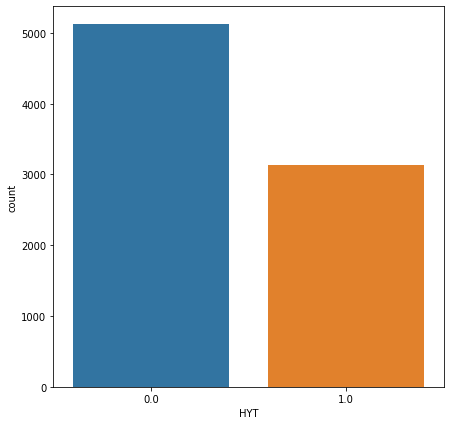

In [133]:
plt.figure(figsize=(7,7))
sns.countplot(x='HYT', data = df)

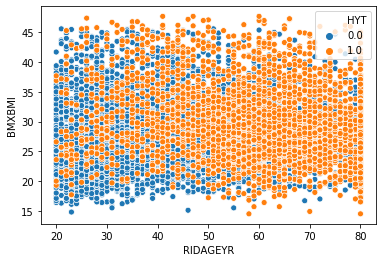

In [134]:
sns.scatterplot(data = df, x ='RIDAGEYR', y = 'BMXBMI', hue = 'HYT')

In [135]:
data = df.values

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.20, random_state=0, stratify=data[:,-1])
print(X_train.shape)
print(Y_train.shape)

(6605, 7)
(6605,)


# Resampling using KUS library

In [137]:
x,y = kus.resample(X_train, Y_train)
print(x.shape)
print(y.shape)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.p

(5094, 7)
(5094,)


In [138]:
new_data = np.column_stack([x,y])
print(new_data.shape)

(5094, 8)


In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
frame_sm_or = pd.DataFrame(new_data)
frame_sm_or.head()

,0,1,2,3,4,5,6,7
0,1.0,54.0,4.0,26.8,2.0,2.0,2.0,1.0
1,2.0,77.0,1.0,33.5,2.0,2.0,2.0,1.0
2,2.0,80.0,2.0,28.5,2.0,2.0,1.0,1.0
3,1.0,27.0,3.0,39.0,2.0,2.0,2.0,1.0
4,2.0,65.0,1.0,29.6,1.0,2.0,2.0,1.0


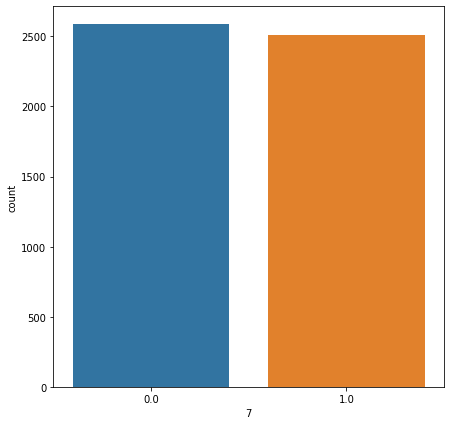

In [140]:
plt.figure(figsize=(7,7))
sns.countplot(x=7, data = frame_sm_or)

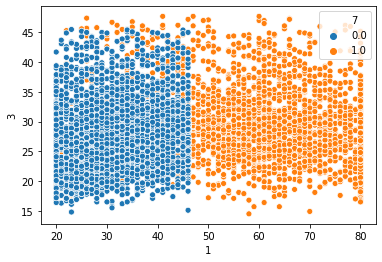

In [141]:
sns.scatterplot(data = frame_sm_or, x =1, y = 3, hue = 7)

In [142]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.calibration import CalibratedClassifierCV
from imblearn.metrics import classification_report_imbalanced

## SVM on KUS resampled Data
lsvm = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm) 
MM_model_p1.fit(x,y) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test,  MM_model_p1.predict(X_test))
print("report : ",MM_report_neigh_sm_p1)



C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.6997578692493946
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.87      0.61      0.85      0.71      0.72      0.50      1025
        1.0       0.57      0.85      0.61      0.68      0.72      0.53       627

avg / total       0.76      0.70      0.76      0.70      0.72      0.51      1652



C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [143]:
## SVM on Original Data
lsvm = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm) 
MM_model_p1.fit(X_train,Y_train) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test,  MM_model_p1.predict(X_test))
print("report : ",MM_report_neigh_sm_p1)


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score :  0.7330508474576272
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.88      0.50      0.80      0.66      0.45      1025
        1.0       0.71      0.50      0.88      0.59      0.66      0.42       627

avg / total       0.73      0.73      0.64      0.72      0.66      0.44      1652



C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Testing on Ecoli dataset (cp as 0 and im as 1)

In [144]:
ecoli = pd.read_csv('ecoli.csv')
ecoli.head()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,Class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0


In [145]:
ecoli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
MCG      220 non-null float64
GVH      220 non-null float64
LIP      220 non-null float64
CHG      220 non-null float64
AAC      220 non-null float64
ALM1     220 non-null float64
ALM2     220 non-null float64
Class    220 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.9 KB


In [146]:
ecoli['Class'].value_counts()

0    143
1     77
Name: Class, dtype: int64

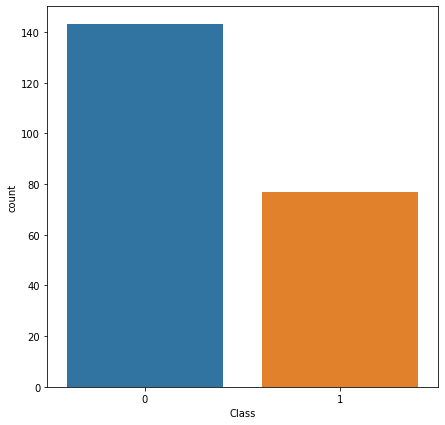

In [147]:
plt.figure(figsize=(7,7))
sns.countplot(x='Class', data = ecoli)

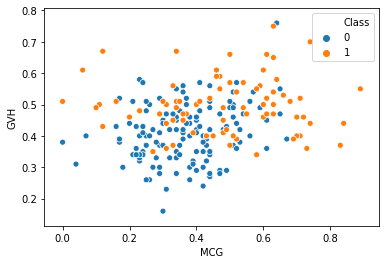

In [148]:
sns.scatterplot(data = ecoli, x ='MCG', y = 'GVH', hue = 'Class')

In [149]:
data2 = ecoli.values

In [150]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data2[:,:-1], data2[:,-1], test_size=0.20, random_state=0, stratify=data2[:,-1])
print(X_train2.shape)
print(Y_train2.shape)

(176, 7)
(176,)


# Resampling using KUS Library

In [151]:
x,y = kus.resample(X_train2, Y_train2)
print(x.shape)
print(y.shape)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.p

(122, 7)
(122,)


In [152]:
new_data2 = np.column_stack([x,y])
print(new_data2.shape)

(122, 8)


In [153]:
frame_sm_or2 = pd.DataFrame(new_data2)
frame_sm_or2.head()

,0,1,2,3,4,5,6,7
0,0.33,0.37,0.48,0.5,0.46,0.65,0.69,1.0
1,0.89,0.55,0.48,0.5,0.51,0.72,0.76,1.0
2,0.30,0.51,0.48,0.5,0.42,0.61,0.34,1.0
3,0.46,0.59,0.48,0.5,0.36,0.76,0.23,1.0
4,0.63,0.65,0.48,0.5,0.66,0.67,0.71,1.0


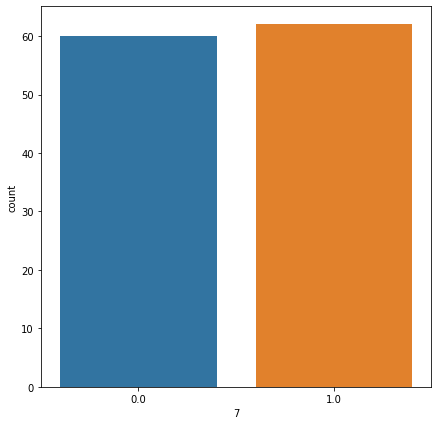

In [154]:
plt.figure(figsize=(7,7))
sns.countplot(x=7, data = frame_sm_or2)

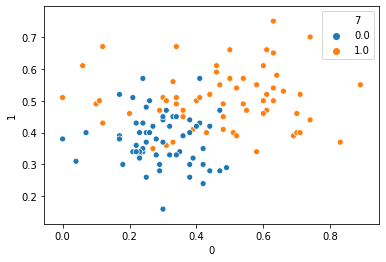

In [155]:
sns.scatterplot(data = frame_sm_or2, x =0, y = 1, hue = 7)

In [156]:
## SVM on KUS resampled data
lsvm = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm) 
MM_model_p1.fit(x,y) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test2) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test2, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test2,  MM_model_p1.predict(X_test2))
print("report : ",MM_report_neigh_sm_p1)


accuracy score :  0.9545454545454546
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.97      0.97      0.93      0.97      0.95      0.90        29
        1.0       0.93      0.93      0.97      0.93      0.95      0.90        15

avg / total       0.95      0.95      0.94      0.95      0.95      0.90        44



In [157]:
## SVM on Original Data
lsvm = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm) 
MM_model_p1.fit(X_train2,Y_train2) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test2) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test2, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test2,  MM_model_p1.predict(X_test2))
print("report : ",MM_report_neigh_sm_p1)


accuracy score :  0.9772727272727273
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.97      1.00      0.93      0.98      0.97      0.94        29
        1.0       1.00      0.93      1.00      0.97      0.97      0.93        15

avg / total       0.98      0.98      0.96      0.98      0.97      0.94        44



# Testing on Pima Indian Diabetes dataset

In [158]:
pima = pd.read_csv('diabetes.csv')
pima.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [159]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [160]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

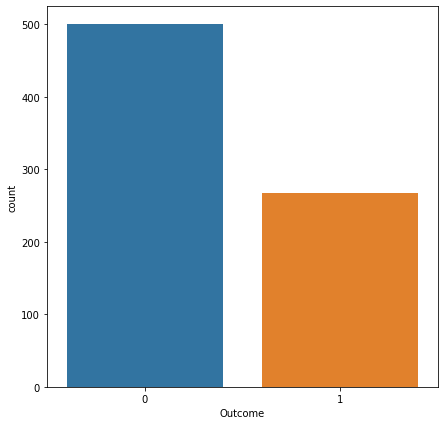

In [161]:
plt.figure(figsize=(7,7))
sns.countplot(x='Outcome', data = pima)

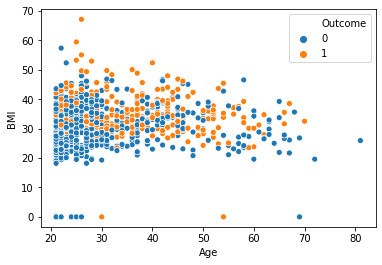

In [162]:
sns.scatterplot(data = pima, x ='Age', y = 'BMI', hue = 'Outcome')

In [163]:
data3 = pima.values

In [164]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(data3[:,:-1], data3[:,-1], test_size=0.20, random_state=0, stratify=data3[:,-1])
print(X_train3.shape)
print(Y_train3.shape)

(614, 8)
(614,)


# Resampling using KUS library

In [165]:
x,y = kus.resample(X_train3, Y_train3)
print(x.shape)
print(y.shape)

C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


(533, 8)
(533,)


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [166]:
new_data3 = np.column_stack([x,y])
print(new_data3.shape)

(533, 9)


In [167]:
frame_sm_or3 = pd.DataFrame(new_data3)
frame_sm_or3.head()

,0,1,2,3,4,5,6,7,8
0,7.0,196.0,90.0,0.0,0.0,39.8,0.451,41.0,1.0
1,7.0,100.0,0.0,0.0,0.0,30.0,0.484,32.0,1.0
2,3.0,173.0,78.0,39.0,185.0,33.8,0.970,31.0,1.0
3,4.0,146.0,92.0,0.0,0.0,31.2,0.539,61.0,1.0
4,10.0,101.0,86.0,37.0,0.0,45.6,1.136,38.0,1.0


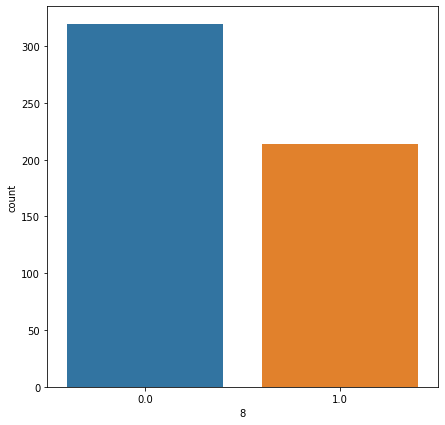

In [168]:
plt.figure(figsize=(7,7))
sns.countplot(x=8, data = frame_sm_or3)

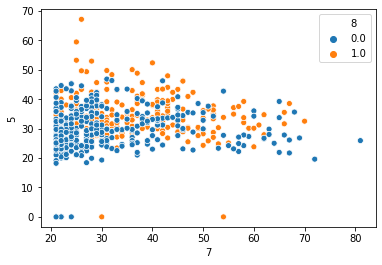

In [169]:
sns.scatterplot(data = frame_sm_or3, x =7, y = 5, hue = 8)

In [170]:
## SVM on KUS resampled data
lsvm = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm) 
MM_model_p1.fit(x,y) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test3) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test3, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test3,  MM_model_p1.predict(X_test3))
print("report : ",MM_report_neigh_sm_p1)


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

accuracy score :  0.7402597402597403
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.78      0.84      0.56      0.81      0.68      0.48       100
        1.0       0.65      0.56      0.84      0.60      0.68      0.45        54

avg / total       0.73      0.74      0.66      0.73      0.68      0.47       154



In [171]:
## SVM on original data
lsvm = LinearSVC(random_state=0) # 7 9
MM_model_p1 = CalibratedClassifierCV(lsvm) 
MM_model_p1.fit(X_train3,Y_train3) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
  
#evaluate model
MM_predictions_p1 = MM_model_p1.predict(X_test3) #model.predict(X_test)
MM_score_p1 = accuracy_score(Y_test3, MM_predictions_p1) #accuracy_score(y_test, y_pred)
    #caution, overall accuracy score can mislead when classes are imbalanced
    
print("accuracy score : ",MM_score_p1)
MM_report_neigh_sm_p1 = classification_report_imbalanced(Y_test3,  MM_model_p1.predict(X_test3))
print("report : ",MM_report_neigh_sm_p1)


C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kajal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

accuracy score :  0.7012987012987013
report :                     pre       rec       spe        f1       geo       iba       sup

        0.0       0.70      0.96      0.22      0.81      0.46      0.23       100
        1.0       0.75      0.22      0.96      0.34      0.46      0.20        54

avg / total       0.71      0.70      0.48      0.64      0.46      0.22       154

